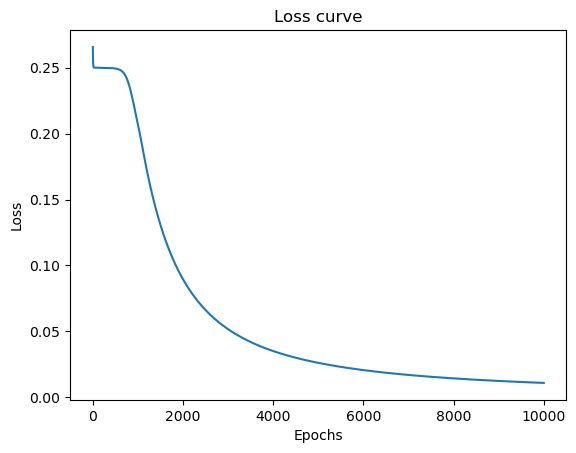

For input [0 0] output is 0
For input [0 1] output is 1
For input [1 0] output is 1
For input [1 1] output is 0


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])
nx=2
nh=2
ny=1
lr=0.5
n_epochs=10000

w1=np.random.rand(nh,nx)
w2=np.random.rand(ny,nh)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def fprop(w1,w2,x):
    z1=np.dot(x,w1.T)
    a1=sigmoid(z1)
    z2=np.dot(a1,w2.T)
    a2=sigmoid(z2)
    return z1,a1,z2,a2

def bprop(w1,w2,z1,a1,z2,a2,y):
    del2=sigmoid_derivative(z2)*(y-a2)
    del1=sigmoid_derivative(z1)*np.dot(del2,w2)
    dw2=lr*np.dot(del2.T,a1)
    dw1=lr*np.dot(del1.T,x)
    return dw2,dw1

losses=[]
for i in range(n_epochs):
    z1,a1,z2,a2=fprop(w1,w2,x)
    loss=mean_squared_error(y,a2)
    losses.append(loss)
    dw2,dw1=bprop(w1,w2,z1,a1,z2,a2,y)
    w2+=dw2
    w1+=dw1

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

def predict(w1,w2,inp):
    z1,a1,z2,a2=fprop(w1,w2,inp)
    if a2>=0.5:
        print("For input",inp,"output is 1")
    else:
        print("For input",inp,"output is 0")

test1=np.array([0,0])
test2=np.array([0,1])
test3=np.array([1,0])
test4=np.array([1,1])

predict(w1,w2,test1)
predict(w1,w2,test2)
predict(w1,w2,test3)
predict(w1,w2,test4)